In [14]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy import interpolate
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv('/Users/clairez/Desktop/BENG203_Final_Project/Data/processed_feature_table.txt', sep='\t', header=0)
print(df.columns)
df

Index(['Sample_id', 'Tissue', 'Age', 'PatientID', 'Ethnicity', 'Gender',
       'Center', 'Disease', 'MMSE', 'CDR', 'Apoe.status', 'apoe_carrier',
       'apoe_dose', 'ENSG00000087085', 'ENSG00000130203', 'ENSG00000091831',
       'ENSG00000142192', 'ENSG00000147571', 'ENSG00000137642',
       'ENSG00000125538', 'ENSG00000036530', 'ENSG00000197943',
       'ENSG00000120885', 'ENSG00000174697', 'ENSG00000232810',
       'ENSG00000116133', 'ENSG00000152234', 'ENSG00000100197',
       'ENSG00000254647', 'ENSG00000087088', 'ENSG00000180210',
       'ENSG00000132170', 'ENSG00000122786', 'ENSG00000170275',
       'ENSG00000159176', 'ENSG00000150760', 'ENSG00000168309',
       'ENSG00000131095', 'ENSG00000146535', 'ENSG00000167191',
       'ENSG00000143772', 'ENSG00000177807', 'ENSG00000005893',
       'ENSG00000165175', 'ENSG00000158186', 'ENSG00000145555',
       'ENSG00000148411', 'ENSG00000117115', 'ENSG00000163346',
       'ENSG00000178104', 'ENSG00000092621', 'ENSG00000164050',
       '

,Sample_id,Tissue,Age,PatientID,Ethnicity,Gender,Center,Disease,MMSE,CDR,...,ENSG00000163346,ENSG00000178104,ENSG00000092621,ENSG00000164050,ENSG00000151552,ENSG00000112531,ENSG00000119729,ENSG00000111961,ENSG00000182902,ENSG00000136205
0,SRR10192321,Plasma,75.0,434,NaN,Female,University of Washington at St. Louis,NCI,30.0,0.0,...,6.964390,5.441454,3.906235,3.497607,4.272396,8.579414,5.087156,8.144319,2.133269,5.555869
1,SRR10192320,Plasma,74.0,435,NaN,Female,University of Washington at St. Louis,NCI,30.0,0.0,...,6.839634,4.688950,0.000000,2.585030,4.910838,8.694468,4.928148,7.161749,0.000000,4.767496
2,SRR10192319,Plasma,73.0,438,NaN,Female,University of Washington at St. Louis,NCI,29.0,0.0,...,6.305982,4.923537,0.000000,2.322826,4.853205,8.939043,4.171937,8.226978,0.707259,5.070986
3,SRR10192318,Plasma,68.0,447,NaN,Male,University of Washington at St. Louis,NCI,29.0,0.0,...,7.457346,5.030317,1.013229,4.322269,4.246930,8.002069,4.264799,7.129143,0.271610,5.823527
4,SRR10192317,Plasma,68.0,447,NaN,Male,University of Washington at St. Louis,NCI,29.0,0.0,...,6.531010,4.440498,2.284944,3.628454,4.190017,8.416520,5.017643,7.112883,1.860865,5.189426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,SRR10192327,Plasma,87.0,2657,Caucasian,Female,BioIVT,NCI,NaN,NaN,...,6.224799,4.034090,1.924056,2.642814,2.662728,7.760740,3.811690,6.336040,1.497704,4.510544
330,SRR10192326,Plasma,86.0,2658,African American,Male,BioIVT,NCI,NaN,NaN,...,7.538239,4.564878,0.000000,5.806535,3.403139,7.851258,4.226974,9.273409,0.000000,6.797327
331,SRR10192325,Plasma,65.0,2659,Hispanic,Female,BioIVT,NCI,NaN,NaN,...,6.028549,4.216106,1.912023,2.852716,2.787602,6.757828,3.567908,5.706961,0.988158,4.287392
332,SRR10192324,Plasma,66.0,2660,Hispanic,Male,BioIVT,NCI,NaN,NaN,...,7.661877,5.473531,4.714356,4.879511,5.878068,7.823881,2.848384,6.765003,0.000000,5.204946


In [4]:
ensg_cols = [col for col in df.columns if col.startswith('ENSG')]
feature_mat = df[['Sample_id', 'Disease', 'Age', 'apoe_carrier'] + ensg_cols]
feature_mat['apoe_carrier'] = feature_mat['apoe_carrier'].map({'apoe4': 1, 'no_apoe4': 0})
feature_mat

/var/folders/_k/b8vsv8097ss3sxnsdwkx1y_80000gn/T/ipykernel_99255/4270139788.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_mat['apoe_carrier'] = feature_mat['apoe_carrier'].map({'apoe4': 1, 'no_apoe4': 0})


,Sample_id,Disease,Age,apoe_carrier,ENSG00000087085,ENSG00000130203,ENSG00000091831,ENSG00000142192,ENSG00000147571,ENSG00000137642,...,ENSG00000163346,ENSG00000178104,ENSG00000092621,ENSG00000164050,ENSG00000151552,ENSG00000112531,ENSG00000119729,ENSG00000111961,ENSG00000182902,ENSG00000136205
0,SRR10192321,NCI,75.0,0.0,1.073635,5.397683,1.745157,6.565631,0.000000,6.915270,...,6.964390,5.441454,3.906235,3.497607,4.272396,8.579414,5.087156,8.144319,2.133269,5.555869
1,SRR10192320,NCI,74.0,1.0,1.331614,2.830816,2.201304,7.736504,0.000000,5.829020,...,6.839634,4.688950,0.000000,2.585030,4.910838,8.694468,4.928148,7.161749,0.000000,4.767496
2,SRR10192319,NCI,73.0,0.0,2.887412,3.797267,2.949139,7.699425,0.000000,5.561178,...,6.305982,4.923537,0.000000,2.322826,4.853205,8.939043,4.171937,8.226978,0.707259,5.070986
3,SRR10192318,NCI,68.0,1.0,3.547307,2.992385,1.732680,8.533783,0.000000,6.232627,...,7.457346,5.030317,1.013229,4.322269,4.246930,8.002069,4.264799,7.129143,0.271610,5.823527
4,SRR10192317,NCI,68.0,1.0,2.565222,3.746290,2.519941,8.369163,0.000000,5.442327,...,6.531010,4.440498,2.284944,3.628454,4.190017,8.416520,5.017643,7.112883,1.860865,5.189426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,SRR10192327,NCI,87.0,NaN,1.184584,1.920156,2.936581,7.124247,0.000000,4.023890,...,6.224799,4.034090,1.924056,2.642814,2.662728,7.760740,3.811690,6.336040,1.497704,4.510544
330,SRR10192326,NCI,86.0,NaN,2.814476,1.170309,5.176617,8.679612,0.000000,7.015452,...,7.538239,4.564878,0.000000,5.806535,3.403139,7.851258,4.226974,9.273409,0.000000,6.797327
331,SRR10192325,NCI,65.0,NaN,0.355799,2.279331,0.827186,7.206924,0.000000,3.351467,...,6.028549,4.216106,1.912023,2.852716,2.787602,6.757828,3.567908,5.706961,0.988158,4.287392
332,SRR10192324,NCI,66.0,NaN,1.830207,0.000000,4.530396,8.893026,0.000000,3.494687,...,7.661877,5.473531,4.714356,4.879511,5.878068,7.823881,2.848384,6.765003,0.000000,5.204946


Best parameters found: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score: 0.8005180481283422


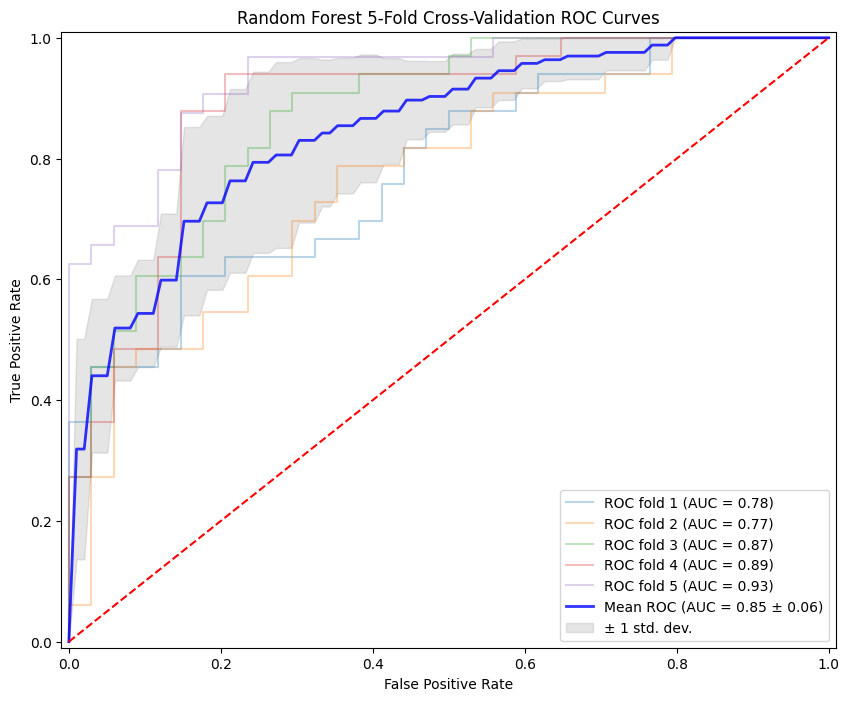


Random Forest Mean AUC: 0.848 (±0.064)


In [15]:
X = feature_mat.drop(['Sample_id', 'Disease', 'Age', 'apoe_carrier'], axis=1)
y = feature_mat['Disease']

# Add GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))


for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_prob = rf_model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label="NCI")
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, alpha=0.3, label=f'ROC fold {fold+1} (AUC = {roc_auc:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, 'b-',
         label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})',
         lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'± 1 std. dev.')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest 5-Fold Cross-Validation ROC Curves')
plt.legend(loc="lower right")
plt.show()

print(f'\nRandom Forest Mean AUC: {mean_auc:.3f} (±{std_auc:.3f})')

Best parameters found: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8084447415329767


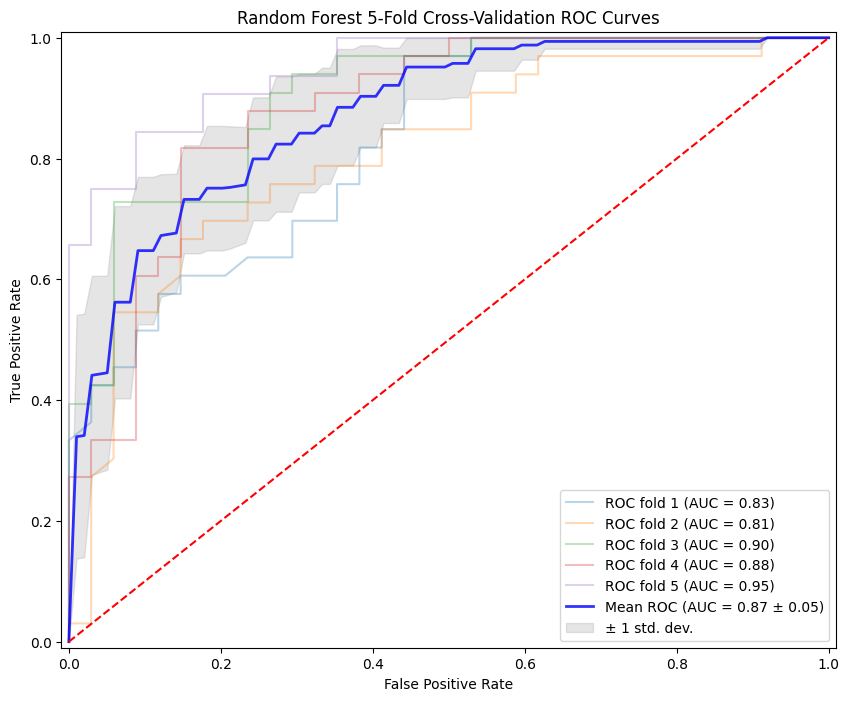


Random Forest Mean AUC: 0.872 (±0.050)


In [16]:
X = feature_mat.drop(['Sample_id', 'Disease'], axis=1)
y = feature_mat['Disease']

# Add GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid_search.fit(X, y)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(10, 8))

for fold, (train_idx, test_idx) in enumerate(cv.split(X, y)):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_prob = rf_model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label='NCI')
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    
    plt.plot(fpr, tpr, alpha=0.3, label=f'ROC fold {fold+1} (AUC = {roc_auc:.2f})')

mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, 'b-',
         label=f'Mean ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})',
         lw=2, alpha=0.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'± 1 std. dev.')

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest 5-Fold Cross-Validation ROC Curves')
plt.legend(loc="lower right")
plt.show()

print(f'\nRandom Forest Mean AUC: {mean_auc:.3f} (±{std_auc:.3f})')